# Data Labelling

This notebook details the labelling of the data. The labels include: 

* **Gender:** The gender of the sender (Gender Guesser API)
* **Stock Price:** Period-high stock price starting from peak to downfall
* **Sentiment:** The polarity of the email message (TextBlob API)

# Setup

In [1]:
# Load timer
%load_ext autotime

In [29]:
# Import necessary libraries 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
#nltk.download()
import re
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Turn off warnings
import warnings 
warnings.simplefilter('ignore')

time: 36.7 ms


In [19]:
# Import cleaned data
emails = pd.read_csv("emails_v2.csv")
emails = emails.drop(['Unnamed: 0'], axis=1)
emails['Date'] = pd.to_datetime(emails['Date']).dt.date

time: 752 ms


In [20]:
emails.head()

,Date,From,Message-Body,Verbosity
0,2001-05-14,phillip.allen@enron.com,forecast,0
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51
2,2000-10-18,phillip.allen@enron.com,successful way go test,3
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10
4,2000-08-31,phillip.allen@enron.com,shoot let,1


time: 6.89 ms


# Add Gender Label

In [21]:
#Get the unique set of names from senders

set(emails['From'])

{'robert.hemstock@enron.com',
 'frank.lemaster@enron.com',
 'ken.lay@enron.com',
 'kayla.harmon@enron.com',
 'john.postlethwaite@enron.com',
 'michelle.sheehan@enron.com',
 'eric.scott@enron.com',
 'dave.delainey@enron.com',
 'monica.clay@enron.com',
 'madhur.dayal@enron.com',
 'zarin.imam@enron.com',
 'piper@enron.com',
 'miguel.maltes@enron.com',
 'richard.lauer@enron.com',
 'joann.collins@enron.com',
 'lindsay.renaud@enron.com',
 'shari.daugherty@enron.com',
 'carlee.gawiuk@enron.com',
 'c..koehler@enron.com',
 'pam.butler@enron.com',
 'rishi.mehta@enron.com',
 'jason.sonnier@enron.com',
 'rebecca.walker@enron.com',
 'beth.miertschin@enron.com',
 'tracy.mclaughlin@enron.com',
 'lorraine.lindberg@enron.com',
 'josie.call@enron.com',
 'wayne.vinson@enron.com',
 'sunita.katyal@enron.com',
 'clement.lau@enron.com',
 'sally.alvarez@enron.com',
 'lisa.connolly@enron.com',
 'bill.rapp@enron.com',
 'eric.bass@enron.com',
 'nick.tubach@enron.com',
 'jeff.smith@enron.com',
 'nicole.scott@enro

time: 18.9 ms


In [22]:
# Create function to get the gender based on the first name 

import gender_guesser.detector as gender
d = gender.Detector()

def get_gender(email):
    name = email.capitalize().split('.')[0]
    sex = d.get_gender(name)
    return sex

time: 414 ms


In [23]:
# Get gender and add new column

emails['Gender'] = emails['From'].apply(get_gender)

emails.head()

,Date,From,Message-Body,Verbosity,Gender
0,2001-05-14,phillip.allen@enron.com,forecast,0,male
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51,male
2,2000-10-18,phillip.allen@enron.com,successful way go test,3,male
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10,male
4,2000-08-31,phillip.allen@enron.com,shoot let,1,male


time: 1.36 s


The percentage of male emails was:  0.49622405541258807
The percentage of female emails was:  0.275651971748559
The percentage of unknown emails was:  0.13795425575410664
The percentage of mostly_male emails was:  0.04704297842660959
The percentage of mostly_female emails was:  0.040016194072328176
The percentage of androgynous emails was:  0.0031105445858085412


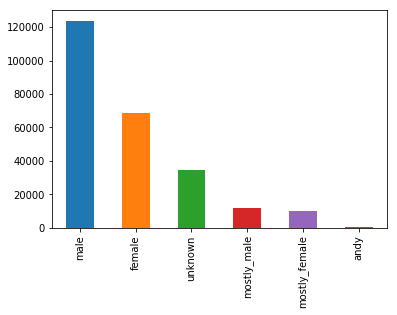

time: 319 ms


In [24]:
# Review statsitics for Gender in the df

emails['Gender'].value_counts().plot(kind='bar')

print ("The percentage of male emails was: ", sum(emails['Gender']=='male') / 249474)
print ("The percentage of female emails was: ", sum(emails['Gender']=='female') / 249474)
print ("The percentage of unknown emails was: ", sum(emails['Gender']=='unknown') / 249474)
print ("The percentage of mostly_male emails was: ", sum(emails['Gender']=='mostly_male') / 249474)
print ("The percentage of mostly_female emails was: ", sum(emails['Gender']=='mostly_female') / 249474)
print ("The percentage of androgynous emails was: ", sum(emails['Gender']=='andy') / 249474)

# Add Stock Price Label

In [25]:
# Convert relevant stockdates into dataframe/datetime format

date_list = ['2000-08-23', '2000-10-23', '2000-12-23', '2001-02-23', '2001-04-23', '2001-06-23', '2001-08-23', '2001-10-23', '2001-12-23']
date_list = pd.DataFrame({'stock_dates':date_list})
date_list['stock_dates'] = pd.to_datetime(date_list['stock_dates']).dt.date

time: 2.14 ms


In [26]:
# Write a function that gets the stock price for different date ranges

def get_stockprice(date):
    if   date >= date_list['stock_dates'].loc[0] and  date < date_list['stock_dates'].loc[1]:
        price = 90
    elif date >= date_list['stock_dates'].loc[1] and  date < date_list['stock_dates'].loc[2]:
        price = 83
    elif date >= date_list['stock_dates'].loc[2] and  date < date_list['stock_dates'].loc[3]:
        price = 85
    elif date >= date_list['stock_dates'].loc[3] and  date < date_list['stock_dates'].loc[4]:
        price = 70
    elif date >= date_list['stock_dates'].loc[4] and  date < date_list['stock_dates'].loc[5]:
        price = 62
    elif date >= date_list['stock_dates'].loc[5] and  date < date_list['stock_dates'].loc[6]:
        price = 50
    elif date >= date_list['stock_dates'].loc[6] and  date < date_list['stock_dates'].loc[7]:
        price = 36
    elif date >= date_list['stock_dates'].loc[7] and  date < date_list['stock_dates'].loc[8]:
        price = 20
    else:
        price = None
    return price 

time: 2.75 ms


In [27]:
# Get stock price and add new column

emails['Stock'] = emails['Date'].apply(get_stockprice)

emails.head()

,Date,From,Message-Body,Verbosity,Gender,Stock
0,2001-05-14,phillip.allen@enron.com,forecast,0,male,62.0
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51,male,62.0
2,2000-10-18,phillip.allen@enron.com,successful way go test,3,male,90.0
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10,male,83.0
4,2000-08-31,phillip.allen@enron.com,shoot let,1,male,90.0


time: 56.4 s


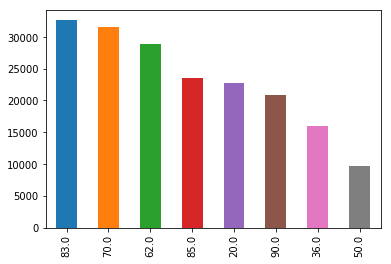

time: 158 ms


In [28]:
# Visualize histogram for stockprice  

emails['Stock'].value_counts().plot(kind='bar')

# Add Sentiment Label

In [30]:
# Reduce the dataset down to those emails during the stock descent

emails = emails[ emails['Stock'].notnull()]

time: 79.7 ms


In [31]:
# New shape

emails.shape

(185680, 6)

time: 2.91 ms


In [32]:
# Write function to get the senitment or polarity and subjectivity 

def get_sentiment_fastest(message):
    score1 = TextBlob(message).sentiment[0]
    score2 = TextBlob(message).sentiment[1]
    return [score1, score2]

time: 727 µs


In [33]:
# Execute the function

emails['Scores'] = emails['Message-Body'].apply(get_sentiment_fastest)

emails.head()

,Date,From,Message-Body,Verbosity,Gender,Stock,Scores
0,2001-05-14,phillip.allen@enron.com,forecast,0,male,62.0,"[0.0, 0.0]"
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51,male,62.0,"[0.15000000000000002, 0.6133333333333334]"
2,2000-10-18,phillip.allen@enron.com,successful way go test,3,male,90.0,"[0.75, 0.95]"
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10,male,83.0,"[0.0, 0.0]"
4,2000-08-31,phillip.allen@enron.com,shoot let,1,male,90.0,"[0.0, 0.0]"


time: 1min 30s


In [34]:
# Convert list to string  

emails['Scores'] = [','.join(map(str, l)) for l in emails['Scores']]

time: 336 ms


In [36]:
# Split score into measures and convert to numeric 

emails['Polarity'], emails['Subjectivity'] = emails['Scores'].str.split(',', 1).str
emails['Polarity'] = pd.to_numeric(emails['Polarity'])
emails['Subjectivity'] = pd.to_numeric(emails['Subjectivity'])

emails.head()

,Date,From,Message-Body,Verbosity,Gender,Stock,Scores,Polarity,Subjectivity
0,2001-05-14,phillip.allen@enron.com,forecast,0,male,62.0,"0.0,0.0",0.00,0.000000
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51,male,62.0,"0.15000000000000002,0.6133333333333334",0.15,0.613333
2,2000-10-18,phillip.allen@enron.com,successful way go test,3,male,90.0,"0.75,0.95",0.75,0.950000
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10,male,83.0,"0.0,0.0",0.00,0.000000
4,2000-08-31,phillip.allen@enron.com,shoot let,1,male,90.0,"0.0,0.0",0.00,0.000000


time: 651 ms


In [37]:
# Drop the scores 

emails = emails.drop(['Scores'], axis=1)

time: 75.4 ms


In [38]:
# Create csv as a checkpoint

#emails.to_csv('emails_v3.csv')

time: 1.96 s


# Sampling and Export for Keras

In [39]:
# Duplicate of emails df
emails_sampler = emails.iloc[:]


# Change gender, stock, and sentiment to binary
emails_sampler['Gender'] = emails_sampler['Gender'].apply( lambda x: 1 if x == 'male' else 0 if x == 'female' else 3 )
emails_sampler['Polarity'] = emails_sampler['Polarity'].apply( lambda x: 0 if x < 0 else 1 )
emails_sampler['Stock'] = emails_sampler['Stock'].apply( lambda x: 0 if x < 45 else 1 )

# Remove non-distinct genders
emails_sampler = emails_sampler[ emails_sampler['Gender'] < 2 ]

# Create 1000 row samples
emails_gender_sample = emails_sampler.sample(1000)
emails_stock_sample = emails_sampler.sample(1000)
emails_sentiment_sample = emails_sampler.sample(1000)

time: 256 ms


In [41]:
# Drop unnecessary columns

emails_gender_sample = emails_gender_sample.drop(['Date', 'From', 'Verbosity', 'Stock', 'Polarity', 'Subjectivity'], axis=1)
emails_stock_sample = emails_stock_sample.drop(['Date', 'From', 'Verbosity', 'Gender', 'Polarity', 'Subjectivity'], axis=1)
emails_sentiment_sample = emails_sentiment_sample.drop(['Date', 'From', 'Verbosity', 'Stock', 'Gender', 'Subjectivity'], axis=1)

time: 3.59 ms


In [42]:
emails_gender_sample.head()

,Message-Body,Gender
32283,see whether trip cancel need fix hi dad get b ...,1
104720,bankruptcy better mark certain enough last stu...,0
29087,folder jeff know sale three decision sue good ...,0
171063,street let smith north improvement please sorr...,0
142663,thing give person regarding morning yesterday ...,1


time: 6.8 ms


In [43]:
emails_stock_sample.head()

,Message-Body,Stock
89241,wright joe today,0
244557,scare,0
225317,pinnacle broker,1
195606,regarding holiday send talking hey along exten...,1
219731,attachment contain preceding,1


time: 6.73 ms


In [44]:
emails_sentiment_sample.head()

,Message-Body,Polarity
213879,try thanks one mat,1
37679,thing back get first look,1
153721,course care mark since look put problem take d...,1
203744,swap entering send recent diamond reminder und...,1
78359,credit want thanks mail call e agreement addre...,1


time: 7.6 ms


In [45]:
# Generate CSV files for Keras

emails_gender_sample.to_csv('gender_labelled_final.csv', index=False, header=False)
emails_stock_sample.to_csv('stock_labelled.csv_final', index=False, header=False)
emails_sentiment_sample.to_csv('sentiment_labelled.csv_final', index=False, header=False)

time: 28.3 ms
